In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58647 sha256=4bde2e51036e3a8a69b6e6d722c1485553d3b30acf26af753e2c47aa63ba7949
  Stored in directory: /root/.cache/pip/wheels/f8/6e/14/26f84dc04734d9b4614f1a74154aba345568d65c0c145c6543
Successfully built bioinfokit


In [ ]:
df = pd.read_csv("/content/data.csv")
df.shape
df.head()
df.dtypes
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       103 non-null    int64  
 1   Brand            103 non-null    object 
 2   Model            103 non-null    object 
 3   AccelSec         103 non-null    float64
 4   TopSpeed_KmH     103 non-null    int64  
 5   Range_Km         103 non-null    int64  
 6   Efficiency_WhKm  103 non-null    int64  
 7   FastCharge_KmH   103 non-null    int64  
 8   RapidCharge      103 non-null    object 
 9   PowerTrain       103 non-null    object 
 10  PlugType         103 non-null    object 
 11  BodyStyle        103 non-null    object 
 12  Segment          103 non-null    object 
 13  Seats            103 non-null    int64  
 14  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 12.2+ KB


Unnamed: 0         0
Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [ ]:
df['PriceEuro'].value_counts()
df['Seats'].value_counts()
df['PlugType'].value_counts()

Type 2 CCS        90
Type 2             9
Type 2 CHAdeMO     3
Type 1 CHAdeMO     1
Name: PlugType, dtype: int64

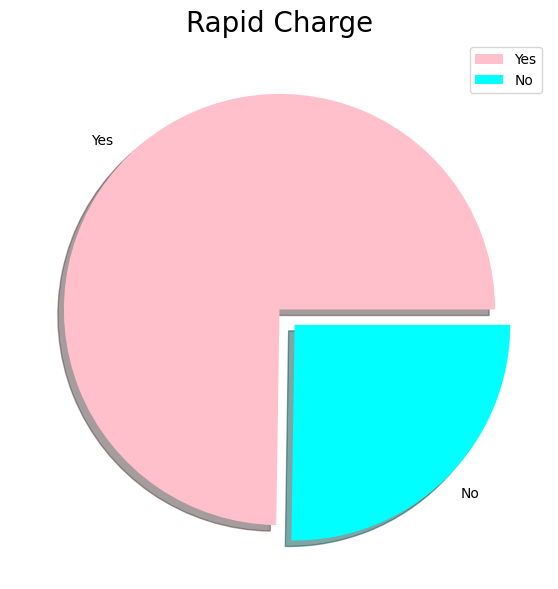

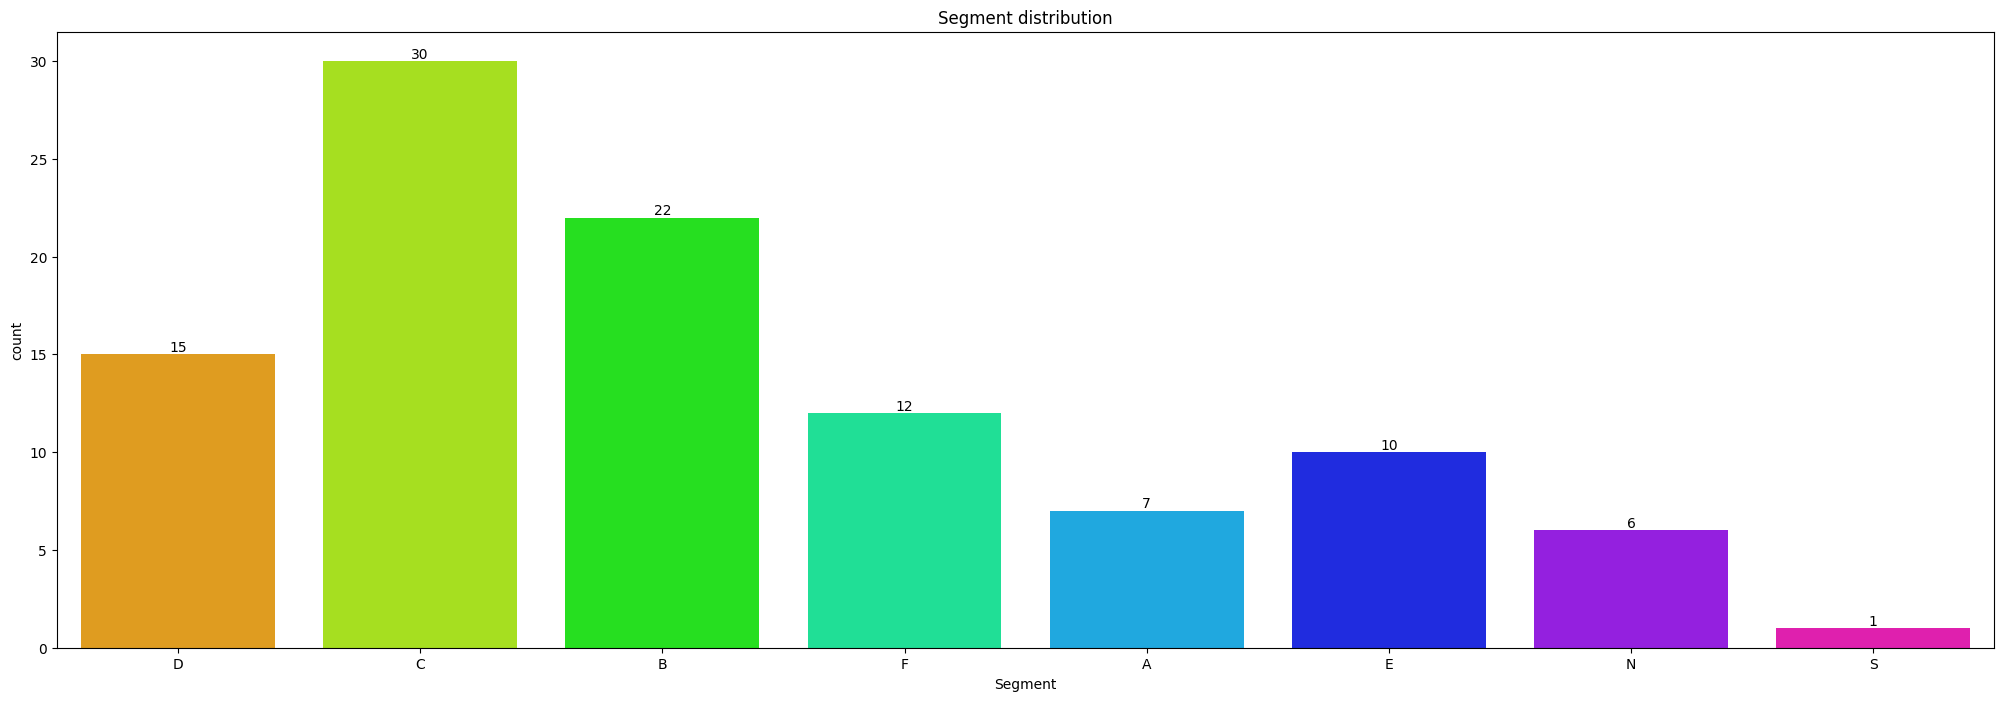

In [ ]:
labels = ["Yes","No" ]
seats = df['RapidCharge'].value_counts()
colors = ['pink', 'cyan']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(seats, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('Rapid Charge', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=df['Segment'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('Segment distribution')
plt.show()

<ipython-input-5-e61543a548d9>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Seats", y="PriceEuro",data=df,orient="v", height=5, aspect=2, palette="Set2",kind="swarm")


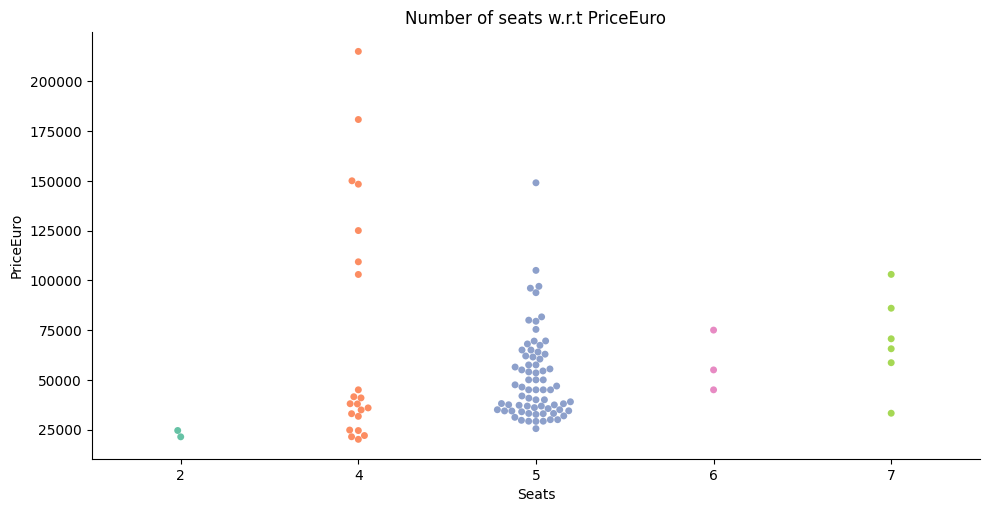

In [ ]:
df['Seats']= df['Seats'].replace({'5': '+5','4':'+4'})
sns.catplot(x="Seats", y="PriceEuro",data=df,orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Number of seats w.r.t PriceEuro')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df
    
cat = ['AccelSec', 'TopSpeed_KmH', 'Efficiency_WhKm', 'FastCharge_KmH', 'Seats', 'PriceEuro']
for i in cat:
    labelling(i)
df

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,11,18,450,5,50,Yes,AWD,Type 2 CCS,Sedan,D,2,52
1,1,Volkswagen,ID.3 Pure,46,9,270,9,7,No,RWD,Type 2 CCS,Hatchback,C,2,11
2,2,Polestar,2,12,15,400,21,36,Yes,AWD,Type 2 CCS,Liftback,D,2,53
3,3,BMW,iX3,26,12,360,32,32,Yes,RWD,Type 2 CCS,SUV,D,2,64
4,4,Honda,e,41,5,170,10,1,Yes,RWD,Type 2 CCS,Hatchback,B,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,Nissan,Ariya 63kWh,30,9,330,25,21,Yes,FWD,Type 2 CCS,Hatchback,C,2,43
99,99,Audi,e-tron S Sportback 55 quattro,10,15,335,49,30,Yes,AWD,Type 2 CCS,SUV,E,2,75
100,100,Nissan,Ariya e-4ORCE 63kWh,20,14,325,27,21,Yes,AWD,Type 2 CCS,Hatchback,C,2,47
101,101,Nissan,Ariya e-4ORCE 87kWh Performance,16,14,375,44,22,Yes,AWD,Type 2 CCS,Hatchback,C,2,61


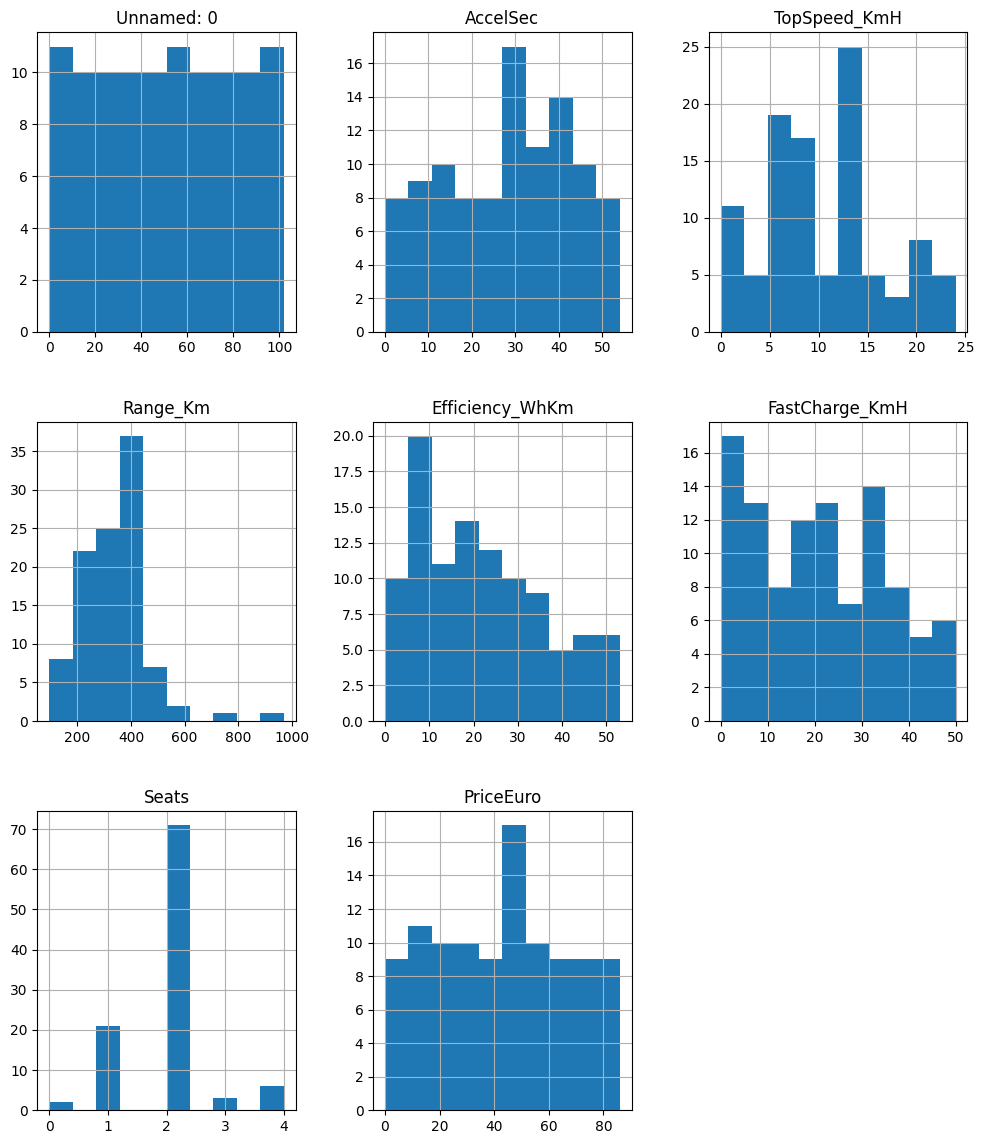

In [ ]:
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

In [ ]:
df_eleven = df.loc[:,cat]
df_eleven

,AccelSec,TopSpeed_KmH,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
0,11,18,5,50,2,52
1,46,9,9,7,2,11
2,12,15,21,36,2,53
3,26,12,32,32,2,64
4,41,5,10,1,1,16
...,...,...,...,...,...,...
98,30,9,25,21,2,43
99,10,15,49,30,2,75
100,20,14,27,21,2,47
101,16,14,44,22,2,61


In [ ]:
df_eleven=df_eleven.drop('Unnamed: 0',axis=1)

In [ ]:
x = df.loc[:,cat].values
x

array([[11, 18,  5, 50,  2, 52],
       [46,  9,  9,  7,  2, 11],
       [12, 15, 21, 36,  2, 53],
       [26, 12, 32, 32,  2, 64],
       [41,  5, 10,  1,  1, 16],
       [ 2, 21, 20, 36,  2, 79],
       [42,  6, 10,  4,  2, 14],
       [34,  6,  6, 19,  2, 10],
       [18, 17,  1, 37,  2, 44],
       [23, 12, 26, 30,  2, 51],
       [16, 12, 37, 21,  2, 65],
       [33,  4,  6,  5,  2,  9],
       [33, 11,  4, 16,  2, 39],
       [ 9, 14, 18, 37,  2, 61],
       [43, 10,  1,  3,  2, 23],
       [33,  9, 15, 34,  1, 40],
       [ 2, 22, 41, 42,  1, 85],
       [49,  1,  8,  0,  1,  2],
       [35,  3, 26,  8,  2, 11],
       [29,  6,  3,  8,  1, 13],
       [34,  6,  6, 19,  2,  8],
       [16, 16, 12, 49,  4, 55],
       [46,  9, 19,  5,  2, 25],
       [ 6, 19, 29, 44,  1, 81],
       [ 5, 23,  9, 47,  2, 57],
       [30,  9, 22, 32,  2, 43],
       [40,  9,  8, 26,  2, 17],
       [14, 12, 31, 24,  2, 56],
       [29,  6,  5,  9,  1, 35],
       [37,  6, 20, 16,  2, 21],
       [26

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)
pca = PCA(n_components=6)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6']
pf = pd.DataFrame(data = pc, columns = names)
pf


,pc1,pc2,pc3,pc4,pc5,pc6
0,21.471564,-32.738961,-6.384592,4.713796,-0.320159,0.211197
1,-40.219249,-1.609173,-1.209114,0.566966,5.441265,0.147209
2,21.024411,-12.467046,-5.280122,-2.311029,-1.448131,0.115530
3,24.786400,4.210696,1.716969,8.694658,-0.698993,-0.118421
4,-37.023303,1.457241,3.786852,-5.106333,0.281248,-0.634620
...,...,...,...,...,...,...
98,0.612577,3.163842,-0.701273,2.014502,-0.853220,0.066466
99,44.766601,14.604177,-2.252393,-3.751286,-1.745222,-0.241584
100,9.266537,1.329791,-1.545895,-5.853289,1.178502,0.023669
101,27.070993,14.834931,-2.586059,-6.134666,-0.008265,-0.183664


In [ ]:
pca.explained_variance_ratio_

array([8.10124020e-01, 1.09709545e-01, 4.42330709e-02, 3.23440140e-02,
       3.19556031e-03, 3.93790512e-04])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.81012402, 0.91983356, 0.96406664, 0.99641065, 0.99960621,
       1.        ])

In [ ]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_eleven.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6
variable,,,,,,
AccelSec,-0.418950,0.312380,0.226507,0.779989,0.258905,-0.013425
TopSpeed_KmH,0.171053,-0.146464,-0.018763,-0.163160,0.959898,-0.030207
Efficiency_WhKm,0.312111,0.813496,-0.486391,-0.034650,0.052596,-0.016374
FastCharge_KmH,0.375362,-0.457532,-0.570155,0.567443,-0.051590,-0.006245
Seats,0.005745,0.010073,-0.010104,0.008181,0.033154,0.999298
PriceEuro,0.746243,0.098769,0.621762,0.204298,-0.070977,0.001683


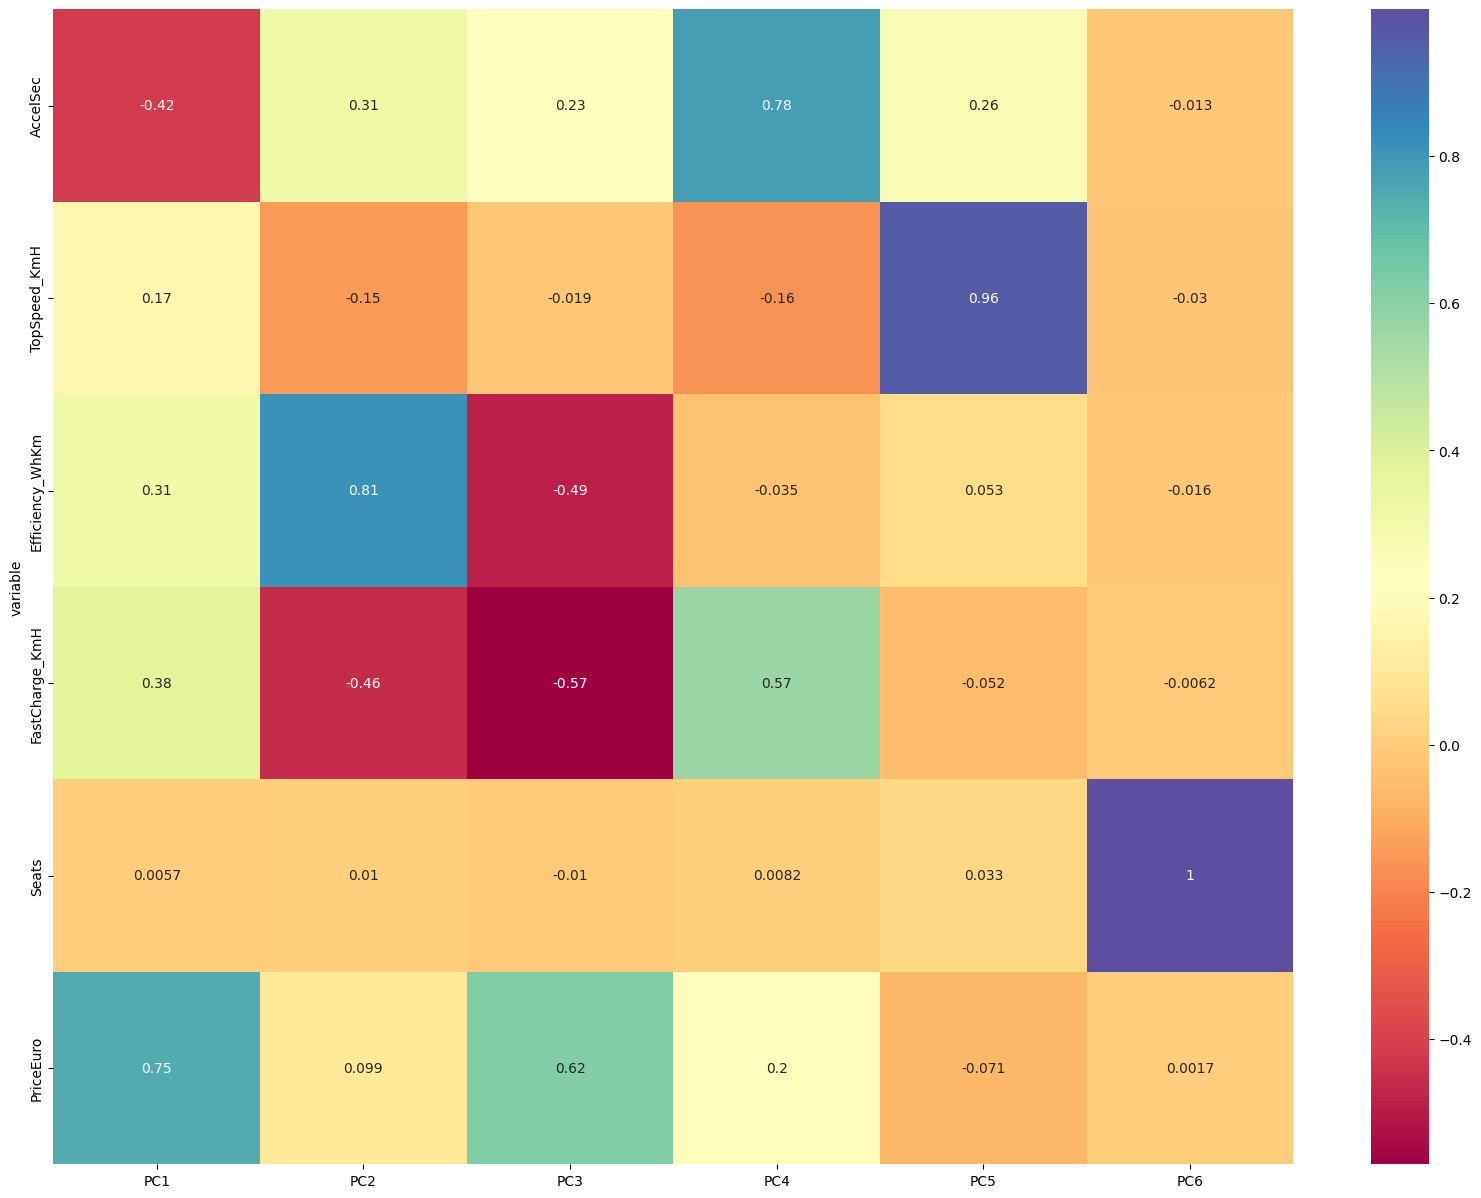

In [ ]:
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

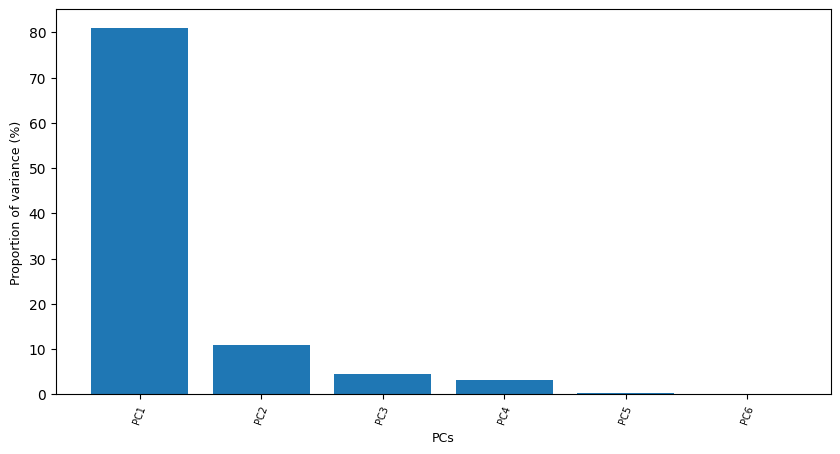

In [ ]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

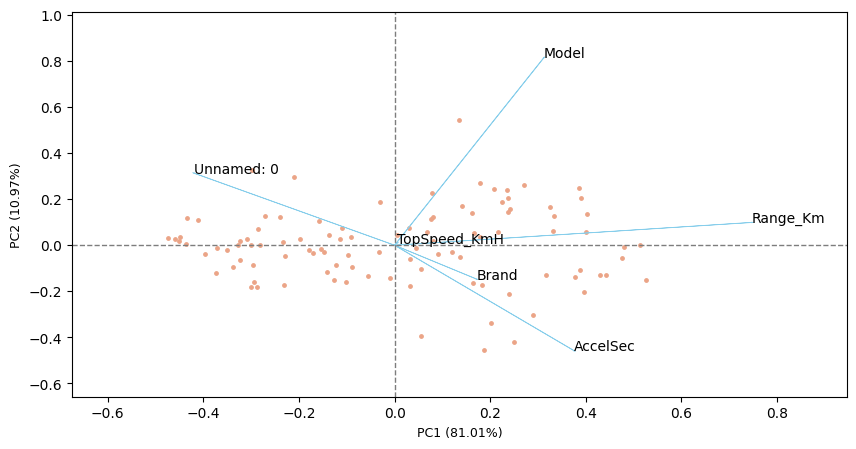

In [ ]:
pca_scores = PCA().fit_transform(x)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

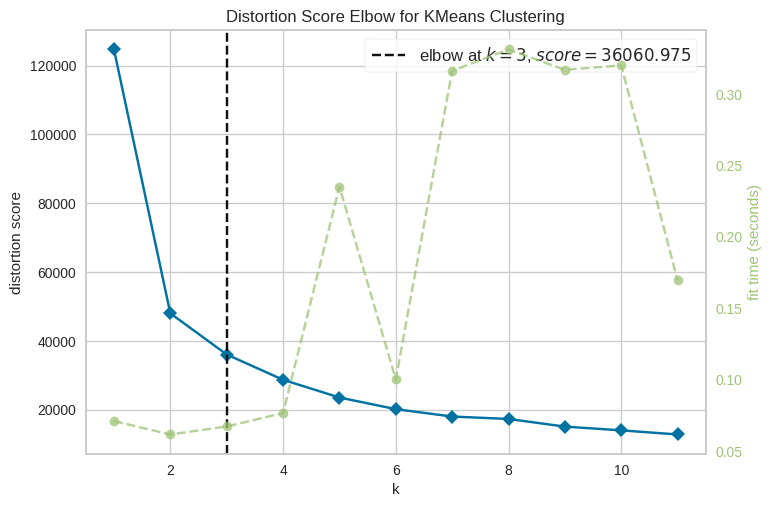

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_eleven)
visualizer.show()

In [ ]:

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df['cluster_num'] = kmeans.labels_ 
print (kmeans.labels_) 
print (kmeans.inertia_) 
print(kmeans.n_iter_) 
print(kmeans.cluster_centers_)

[3 0 1 1 0 3 0 0 2 1 1 0 2 3 0 2 3 0 0 0 0 3 0 3 3 2 0 1 2 2 1 2 0 3 0 2 2
 2 0 2 3 0 1 0 0 2 2 3 1 2 1 3 2 2 3 0 2 0 2 3 0 3 1 1 1 3 0 1 0 1 2 2 3 1
 0 0 1 0 1 3 2 3 0 2 1 0 1 1 1 2 1 0 2 1 2 2 0 1 2 3 1 1 1]
28842.937231968815
6
[[43.46666667  4.36666667 10.6         5.7         1.63333333 13.43333333]
 [22.85185185 12.22222222 36.18518519 25.81481481  2.14814815 58.51851852]
 [31.48148148  8.96296296 16.25925926 18.81481481  1.81481481 36.33333333]
 [ 6.36842105 19.89473684 28.05263158 39.42105263  2.10526316 72.73684211]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from collections import Counter
Counter(kmeans.labels_)

Counter({3: 19, 0: 30, 1: 27, 2: 27})

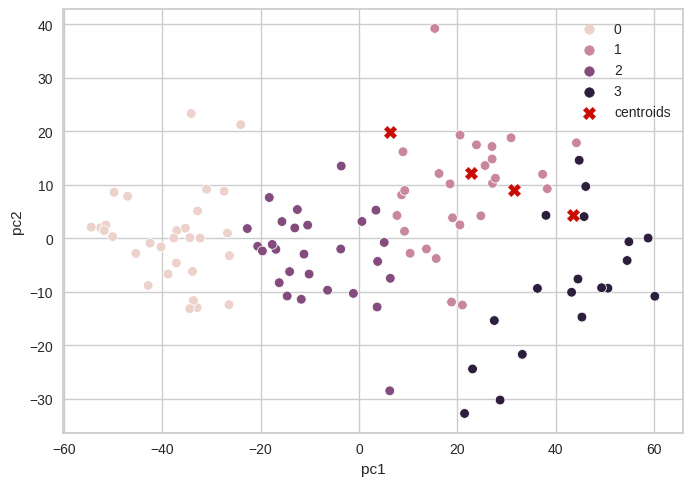

In [ ]:
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['RapidCharge'])
# crosstab = crosstab[['-3','-2','-1','+1','+2','+3']]
crosstab 

RapidCharge,No,Yes
cluster_num,,
0,12,18
1,6,21
2,7,20
3,1,18


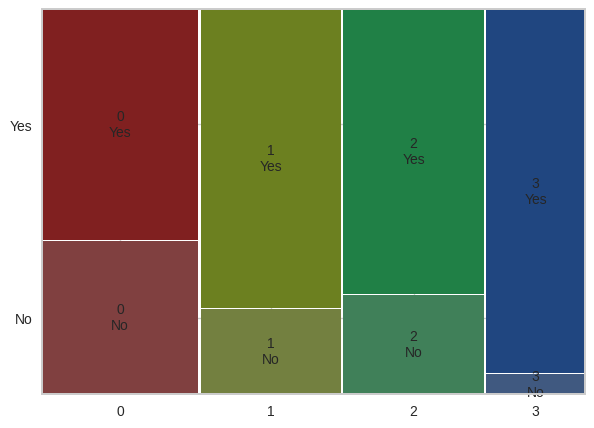

In [ ]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='RapidCharge'>

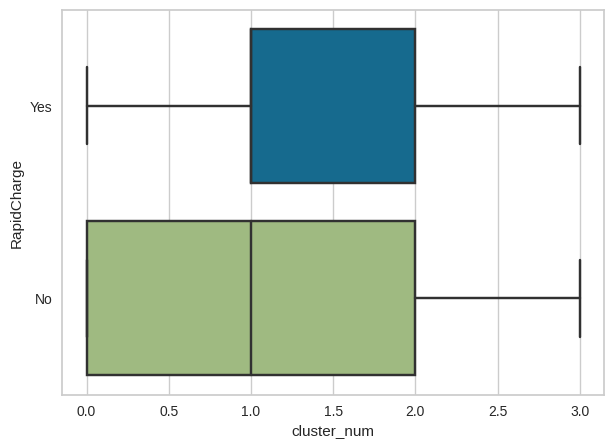

In [ ]:
sns.boxplot(x="cluster_num", y="RapidCharge", data=df)

In [ ]:
df['Segment'] = LabelEncoder().fit_transform(df['Segment'])
visit = df.groupby('cluster_num')['Segment'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,Segment
0,0,1.400000
1,1,3.518519
2,2,1.703704
3,3,4.578947


In [ ]:
df['PriceEuro'] = LabelEncoder().fit_transform(df['PriceEuro'])
PriceEuro = df.groupby('cluster_num')['PriceEuro'].mean()
PriceEuro = PriceEuro.to_frame().reset_index()
PriceEuro

,cluster_num,PriceEuro
0,0,13.433333
1,1,58.518519
2,2,36.333333
3,3,72.736842


In [ ]:
segment = PriceEuro.merge(visit, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,PriceEuro,Segment_x,Segment_y
0,0,13.433333,1.400000,1.400000
1,1,58.518519,3.518519,3.518519
2,2,36.333333,1.703704,1.703704
3,3,72.736842,4.578947,4.578947
